In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# import some data to play with
#import seaborn as sns
#iris=sns.load_dataset("iris")
iris = pd.read_csv('C:/Users/HP/Desktop/DataScience_and_Python/DataScience_With_Python/Decision_Tree_in_Python/iris.csv',index_col=0)

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Complete Iris dataset, encoding different values in column Species into numericals, setosa=0,virginia=1,versicolor=2
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [27]:
#selecting first 4 columns as x and column Species as y
x=iris.iloc[:,0:4]
y=iris['Species']

In [6]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [7]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [8]:
#3 unique values in column species
iris['Species'].unique()

array([0, 1, 2])

In [29]:
#value count of all the class in species, we have balanced data 
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [10]:
colnames = list(iris.columns)
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [30]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,shuffle=True)

In [31]:
y_train

Id
63    1
24    0
27    0
49    0
3     0
     ..
72    1
13    0
51    1
8     0
71    1
Name: Species, Length: 120, dtype: int32

### Building Decision Tree Classifier using Gini Criteria

In [44]:
#minimum sample split means if bucket contains less than 5 data point we should not split further
model = DecisionTreeClassifier(criterion ='gini',min_samples_split=5)
#construct decision tree
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

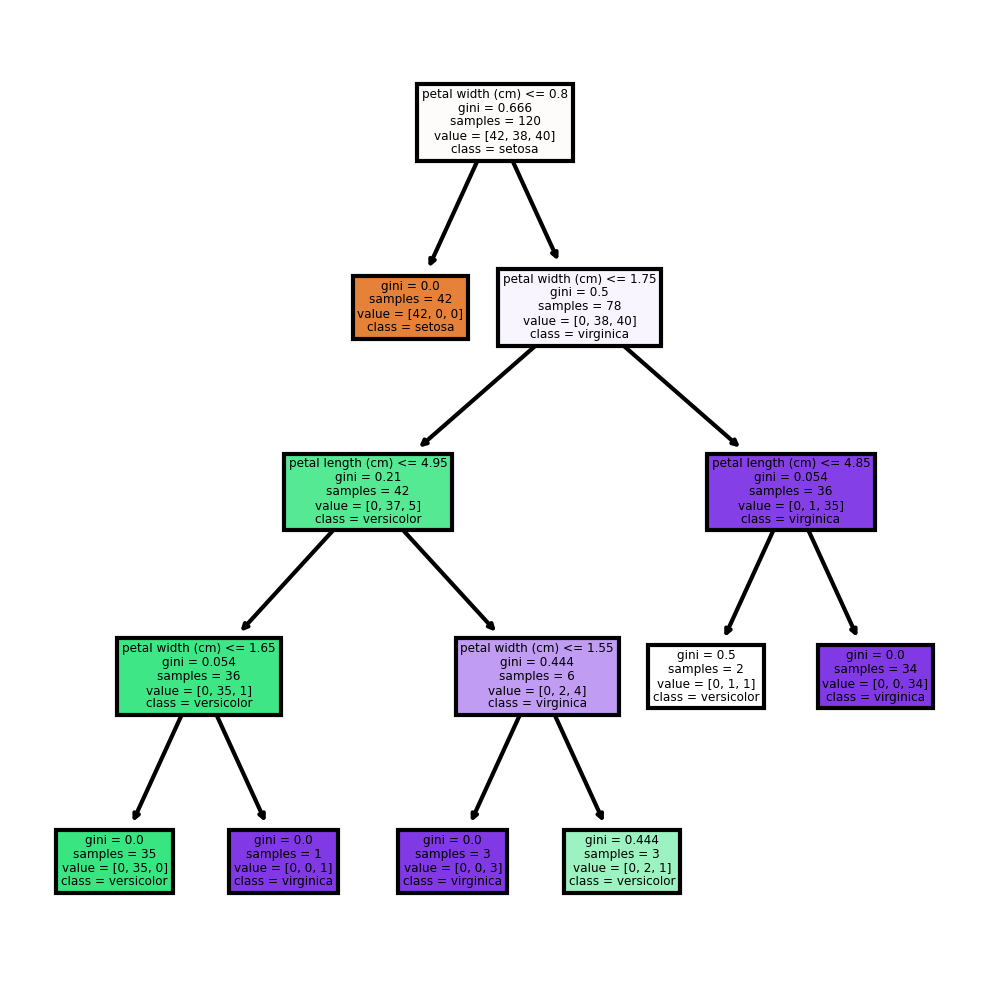

In [45]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,    
               class_names=cn,
               filled = True);

#best condition found is petal_width<=0.8 which will make the impurity min  
#orange bucket has 0 impurity and is sorted so no splitting, while white bucket we still continue to split
# at last level the impurity for leftmost green bucket is 0 while the purple bucket besides it has sample=1 which is <5 , hence no splting
# the remaining buckets are also functioning the same way, they either have gini=0 or have reached minimum sample limit

In [47]:
# for each bucket the majority of the datapoints decides the class
#ex : for leaf orange bucket, 42 datapoints are setosa so all those datapoints are predicted as setosa
# for last leaf node of color green , there were 35 samples which were versicolor so that whole class is declared as versicolor
# when we look at the turquoise bucket, there are total 3 samples in which 2 are versicolor and 1 is virginica so here we went with majority and the class is declared/predicted as versicolor


In [15]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [16]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [17]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [18]:
# Accuracy 
np.mean(preds==y_test)

0.9666666666666667

### Building Decision Tree Classifier (CART) using Entropy Criteria (Entropy is another way to calculate impurity)

In [48]:
from sklearn.tree import DecisionTreeClassifier
model_Entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [49]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [50]:
#Prediction and computing the accuracy
pred=model.predict(x_test) 
np.mean(preds==y_test)

0.9666666666666667

#### Decision Tree Regression Example

In [51]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [52]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [54]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
#Find the accuracy
model.score(X_test,y_test)

0.8555498859406891